## Example

In this simple example, we load an image, pre-process it, and classify it with a pretrained EfficientNet.

In [1]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [2]:
model_name = 'efficientnet-b7'
image_size = EfficientNet.get_image_size(model_name) # 224

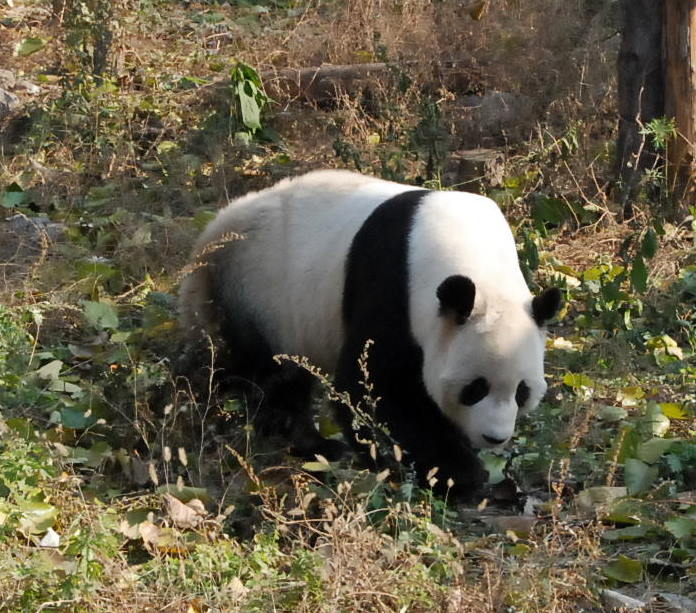

In [3]:
# Open image
img = Image.open('img.jpg')
img

In [4]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [5]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [7]:
# Classify with EfficientNet
model = EfficientNet.from_pretrained(model_name)
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

Loaded pretrained weights for efficientnet-b7
-----
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (81.80%)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.38%)
American black bear, black bear, Ursus americanus, Euarctos americanus      (0.28%)
brown bear, bruin, Ursus arctos                                             (0.14%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.13%)
